In [135]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
data = datasets.fetch_california_housing(as_frame=True)

In [136]:
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [138]:
X = df['MedInc'].to_list()

y = df['AveRooms'].to_list()

# 1. Find mean for X and y  
Formula :     $$μ = \frac{1}{N}\sum_{i=1}^n x_i$$

In [139]:
def calculate_mean(item):          # python
    return sum(item)/len(item)

X_mean = calculate_mean(X)
y_mean = calculate_mean(y)

X_mean

3.8706710029070246

# 1. Calculate covariance for X and y


 Formula :                $$Cov(X,Y)=\frac{1}{N}\sum_{i=1}^n​(x_i​−μ_X​)(y_i​−μ_Y​)$$​  


In [140]:

# Write python code to find covarience from scratch.     
def calculate_covariance(X, y):
     
    covarianceX_y = sum((X[i]- X_mean)*(y[i]- y_mean) for i in range(len(X))) / len(X)
   
    return covarianceX_y

calculate_covariance(X,y)

1.5364935631793397

In [141]:
df['MedInc'].cov(df['AveRooms'])     # find with pandas

1.53656800930382

# 2. Calculate correlation between X and y


Formula Correlation :                $$\rho = \frac{Cov(X,Y)}{\sigma_X*\sigma_Y}$$




Formula Standard Deviation
$$\sigma_X   =      \sqrt{\frac{\sum_{i=1}^n (x_i-\mu)^2}{n}}$$

In [142]:

# find with python code

def calculate_correlation(X,y):
    std_X = (sum((X[i]- X_mean)**2 for i in range(len(X)))/len(X))**0.5
    std_y = (sum((y[i]- y_mean)**2 for i in range(len(y)))/len(y))**0.5

    correlationX_y = calculate_covariance(X,y)/(std_X*std_y)

    return correlationX_y

calculate_correlation(X,y)


0.32689543164129486

In [143]:
df['AveRooms'].corr(df['MedInc'])        # find with pandas

0.3268954316412956

# 3. Calculate Probability Density Function

Formula PDF (Gaussian Normal Distribution)  :         $$f(x)  = (\frac{1}{\sigma\sqrt{2\pi}})e^{\frac{(x-\mu)^{2}}{2\sigma^{2}}}$$







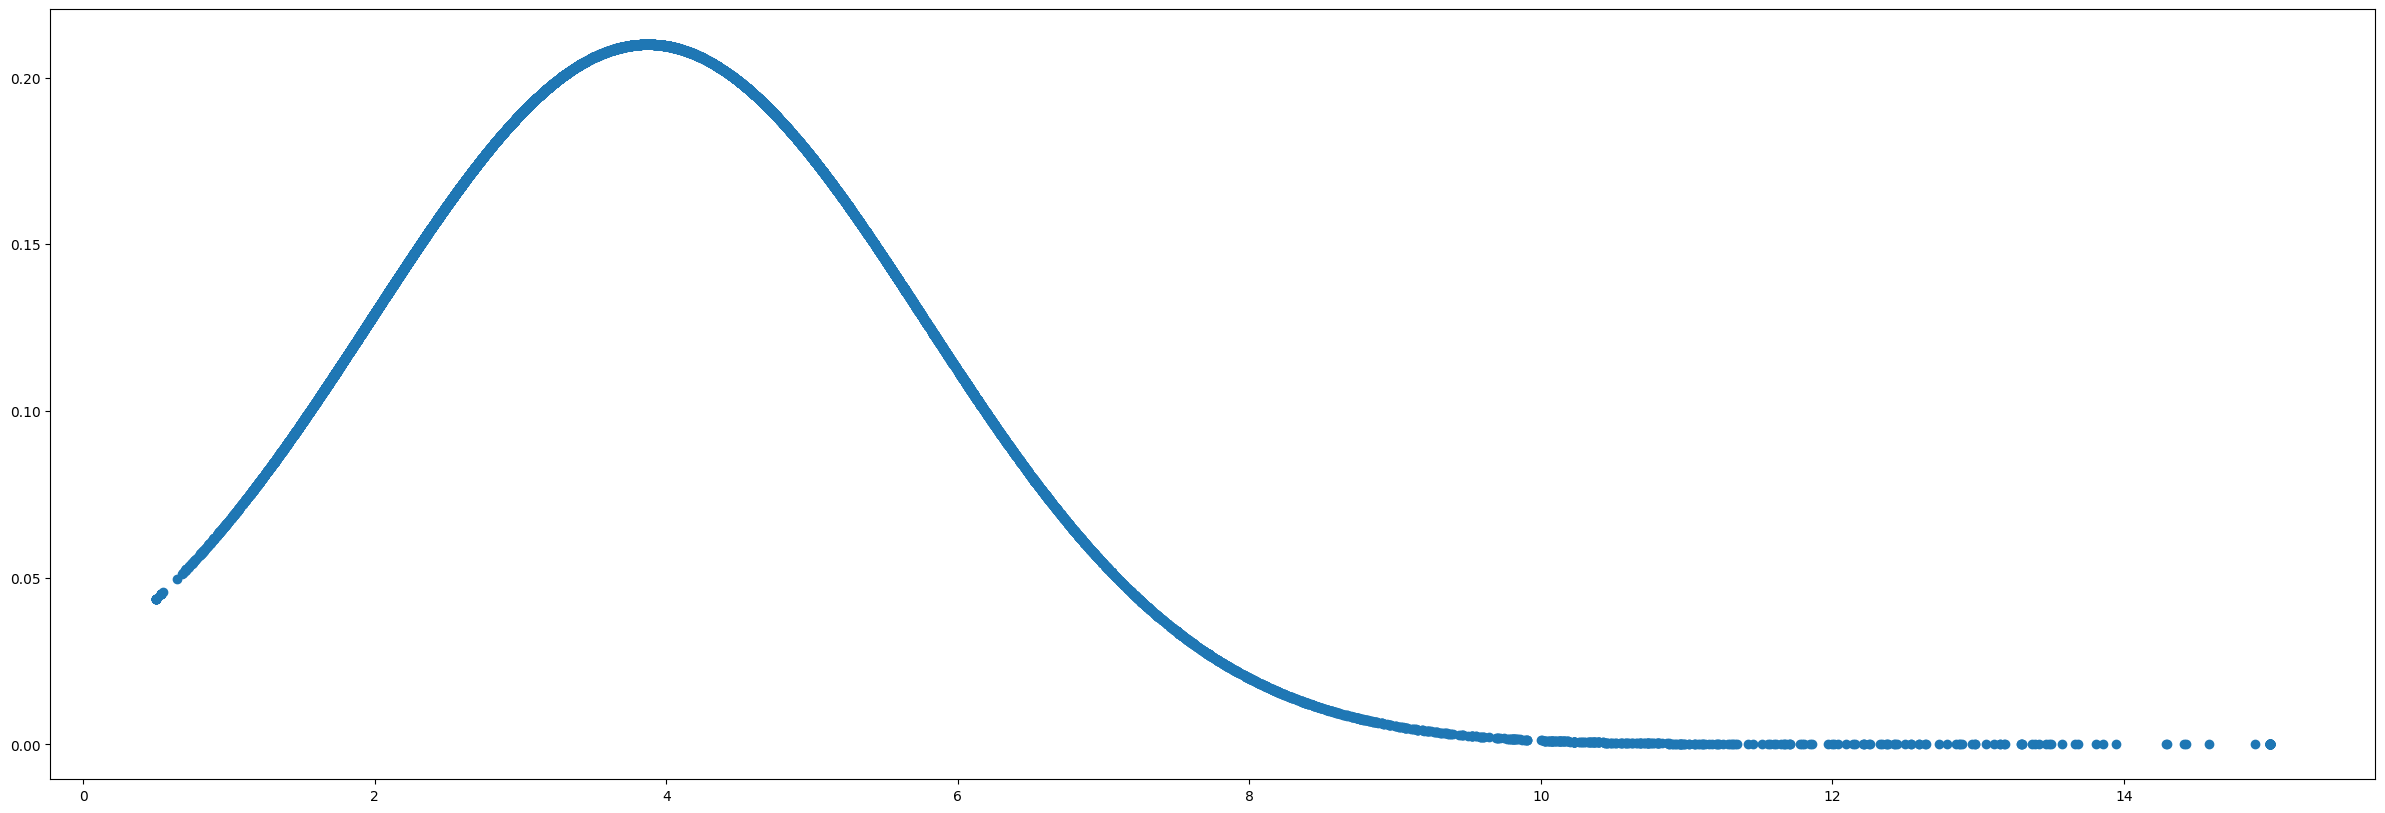

In [144]:
import math

# find PDF for Df['MedInc']

def calculate_pdf_X(X):
    mu_X = sum(X)/ len(X)
    sigma_X = (sum((X[i]- mu_X)**2 for i in range(len(X)))/len(X))**0.5 
    
    coeff = 1/(sigma_X*math.sqrt(2*math.pi))
    pdf_values = []
    for x_i in X:
        exponent = math.exp(-((x_i-mu_X)**2) / (2*sigma_X**2))

        pdf = coeff*exponent

        pdf_values.append(pdf)
    return pdf_values

pdf_value = calculate_pdf_X(X)
plt.figure(figsize=(30,10))
plt.scatter(X, pdf_value)
plt.show()

# 4 . Bivariate Normal Distribution Formula    :
$$f(x, y) =  (\frac{1}{2\pi\sigma_X\sigma_y\sqrt{1 - ρ²}})^{exp(-\frac{1}{2 (1 - ρ²)} * [\frac{(x - \mu_X)^2}{\sigma_X^2} - \frac{2\rho_Xy((x - \mu_X)(y - \mu_y))}{\sigma_X \sigma_y} + \frac{(y - \mu_y)^2}{\sigma_y^2}])}$$

In [145]:
import math

def calculate_pdf(X,y):
    sigma_X = (sum((X[i]- X_mean)**2 for i in range(len(X)))/len(X))**0.5   # Standard deviation 
    sigma_y = (sum((y[i]- y_mean)**2 for i in range(len(y)))/len(y))**0.5   # Standard deviation 
    mu_X = sum(X)/ len(X)                                                   # Mean
    mu_y = sum(y)/ len(y)                                                   # Mean
    r = calculate_correlation(X,y)                                          # Correlation X with y

    pdf_values_X_y = []
    coeff  = 1 / (2 * math.pi * sigma_X * sigma_y * math.sqrt(1 - r**2) )

    for X_i , y_i in zip(X,y):
        Z_x = (X_i - mu_X)/sigma_X                                         # Z - score  for X
        Z_y = (y_i - mu_y)/sigma_y                                         # Z - score  for y
        expo = math.exp(-1/(2*(1-r**2)) * (Z_x**2 - 2*r*Z_x*Z_y + Z_y**2))
        pdf_values_X_y.append(coeff * expo)

    return pdf_values_X_y


Z = calculate_pdf(X,y)



            
    


Text(0.5, 0, 'Probability Density')

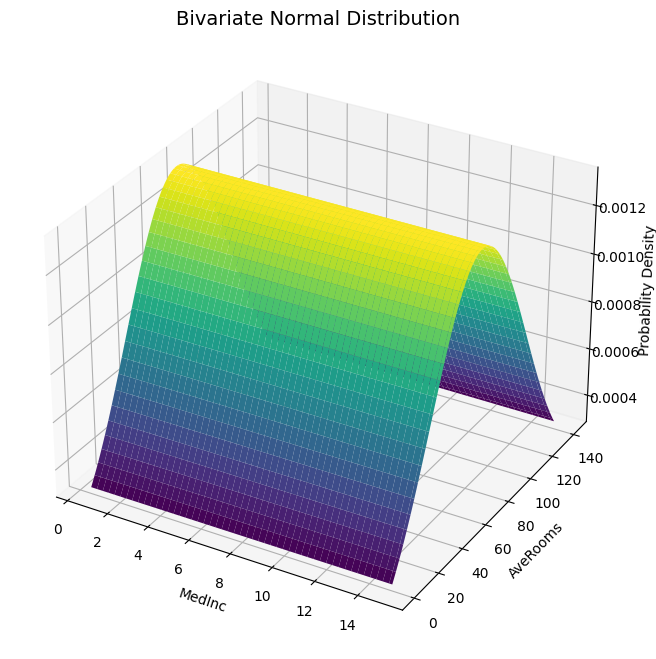

In [146]:
from mpl_toolkits import mplot3d

a = np.array(X)    # make array from list 
b = np.array(y)    # make array from list 

 
x1 = np.linspace(min(a), max(a), 100)        # take random data with step  100  to avoid memory error  from X
y1 = np.linspace(min(b), max(b), 100)        # take random data with step  100 to avoid memory error  from y
Z1 = calculate_pdf(x1,y1)                 
Z1 = np.array(Z1).reshape(-1,1)              # make np.array and reshape 1d to 2d
X1,Y1 = np.meshgrid(x1,y1)



fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X1, Y1, Z1, cmap='viridis')
ax.set_title('Bivariate Normal Distribution', fontsize=14)
ax.set_xlabel('MedInc')
ax.set_ylabel('AveRooms')
ax.set_zlabel('Probability Density')

# 5. Min - Max scaling:


In [ ]:
def min_max_scale(arg1):           # Min max scaling for  df['MedInc']
    scaled_arg = [(x - min(arg1))/(max(arg1) - min(arg1)) for x in arg1]
    return scaled_arg

arg1 = df['MedInc'].to_list()
min_max_scale(arg1)


[0.5396684183666433,
 0.5380270616957007,
 0.46602805478545123,
 0.3546985558819878,
 0.2307761272258314,
 0.24392077350657235,
 0.21787285692611139,
 0.18069405939228425,
 0.10899849657246108,
 0.22008661949490352,
 0.1864250148273817,
 0.19107322657618517,
 0.17759065392201487,
 0.14990827712721205,
 0.09770899711728115,
 0.11207431621632806,
 0.15690128412021903,
 0.11174328629949933,
 0.10283996082812652,
 0.1450600681369912,
 0.05916470117653549,
 0.08369539730486476,
 0.08448848981393361,
 0.1159087460862609,
 0.14483248506917148,
 0.13130163721879698,
 0.13515675645853162,
 0.09021254879243046,
 0.07879201666183916,
 0.08190231858870912,
 0.0984469179735452,
 0.10079860967434932,
 0.08944704210976401,
 0.06035089171183846,
 0.1538185680197515,
 0.06801285499510351,
 0.04119253527537551,
 0.06278534089184977,
 0.20552130315443926,
 0.1441290464959104,
 0.11019848002096522,
 0.054157873684500896,
 0.036213293609743305,
 0.23892084247113837,
 0.17328036854664075,
 0.150128963738431

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaled_X  = MinMaxScaler().fit_transform(df[['MedInc']])
df

array([[0.53966842],
       [0.53802706],
       [0.46602805],
       ...,
       [0.08276438],
       [0.09429525],
       [0.13025338]])